In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset and inspect for missing values, data types, and inconsistencies
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

# Display the first few rows to understand the structure of the data
print("Missing Values:")
print(missing_values)
print("\
Data Types:")
print(data_types)
print("\
First 5 Rows:")
print(df.head())

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        

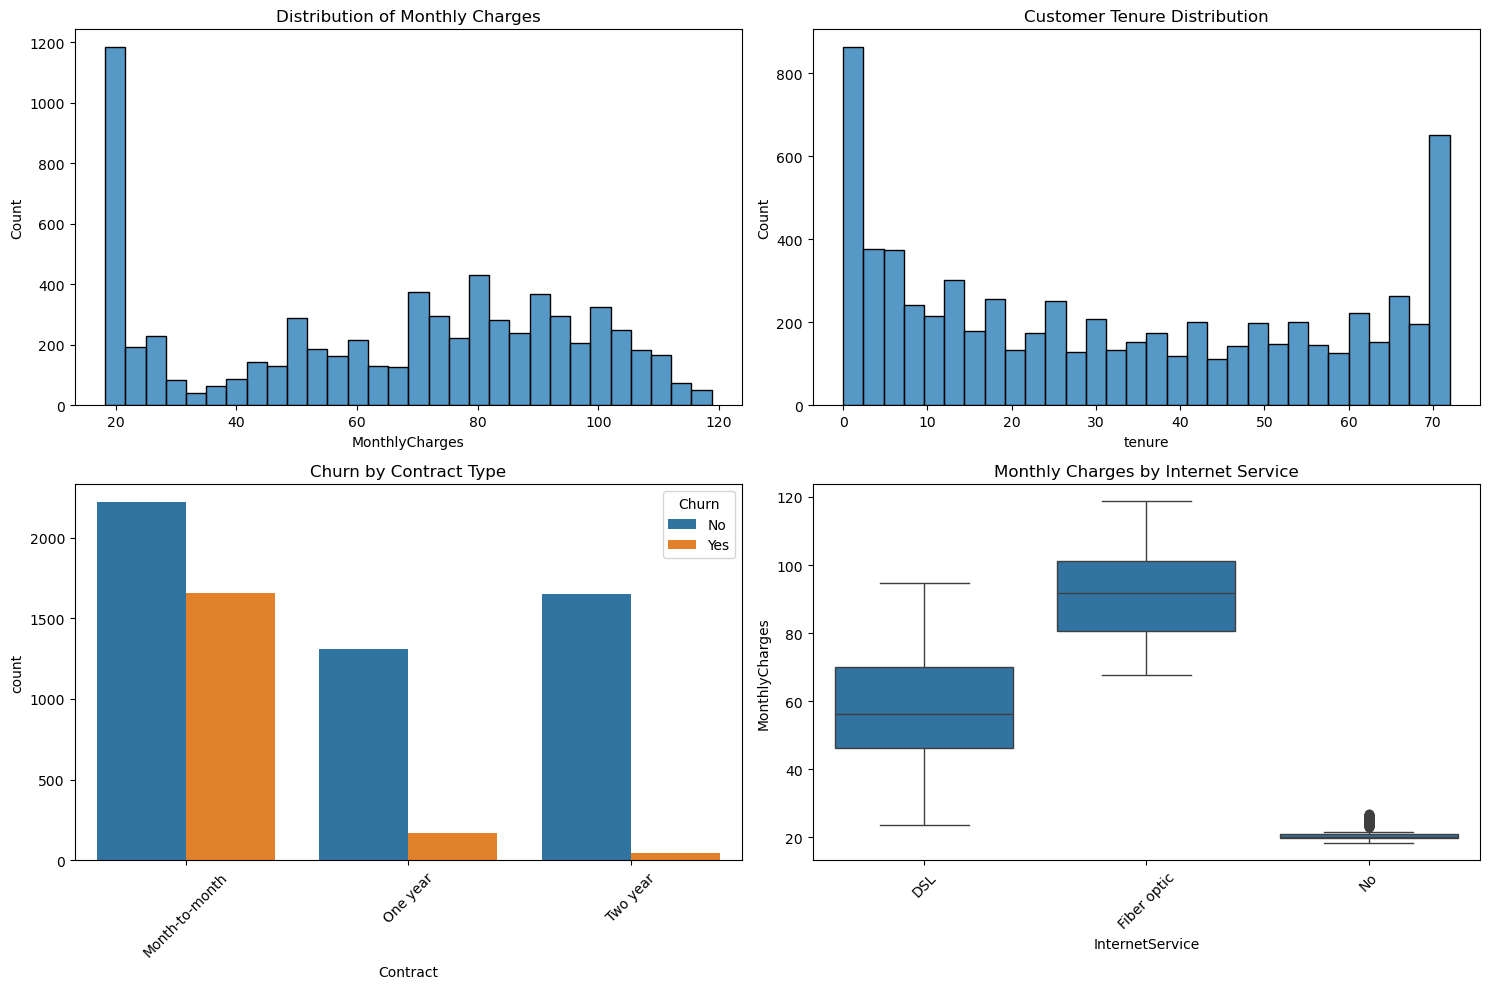

Key Performance Indicators (KPIs):
1. Churn Rate: 26.54%
2. Retention Rate: 73.46%
3. Average Revenue per User (ARPU): $64.76
4. Average Customer Lifetime Value (CLV): $2096.41
5. Average Customer Lifespan: 32.4 months


In [9]:

# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Calculate KPIs
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
retained_customers = len(df[df['Churn'] == 'No'])

# 1. Churn Rate
churn_rate = (churned_customers / total_customers) * 100

# 2. Average Revenue per User (ARPU)
arpu = df['MonthlyCharges'].mean()

# 3. Customer Lifetime Value (CLV) - simplified calculation
avg_customer_lifespan = df['tenure'].mean()
clv = arpu * avg_customer_lifespan

# 4. Retention Rate
retention_rate = (retained_customers / total_customers) * 100

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Monthly Charges Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', bins=30)
plt.title('Distribution of Monthly Charges')

# 2. Tenure Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='tenure', bins=30)
plt.title('Customer Tenure Distribution')

# 3. Churn by Contract Type
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)

# 4. Average Monthly Charges by Internet Service
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='InternetService', y='MonthlyCharges')
plt.title('Monthly Charges by Internet Service')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print KPIs
print("\
Key Performance Indicators (KPIs):")
print(f"1. Churn Rate: {churn_rate:.2f}%")
print(f"2. Retention Rate: {retention_rate:.2f}%")
print(f"3. Average Revenue per User (ARPU): ${arpu:.2f}")
print(f"4. Average Customer Lifetime Value (CLV): ${clv:.2f}")
print(f"5. Average Customer Lifespan: {avg_customer_lifespan:.1f} months")

In [11]:
# Handle missing values and duplicates
# Check for missing values
df_missing = df.isnull().sum()

# Drop duplicates if any
df = df.drop_duplicates()

# Standardize date formats (if applicable) - no date columns in this dataset

# Categorize customers into churned and active groups
df['Churn_Group'] = df['Churn'].apply(lambda x: 'Churned' if x == 'Yes' else 'Active')

# Feature engineering
# 1. Tenure is already provided in months
# 2. Average usage frequency - not available in this dataset
# 3. Total spend over time
df['TotalSpend'] = df['MonthlyCharges'] * df['tenure']

# Display the updated dataset and missing values
print("Missing Values:")
print(df_missing)
print("\
Updated Dataset Head:")
print(df.head())

Missing Values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Updated Dataset Head:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2   

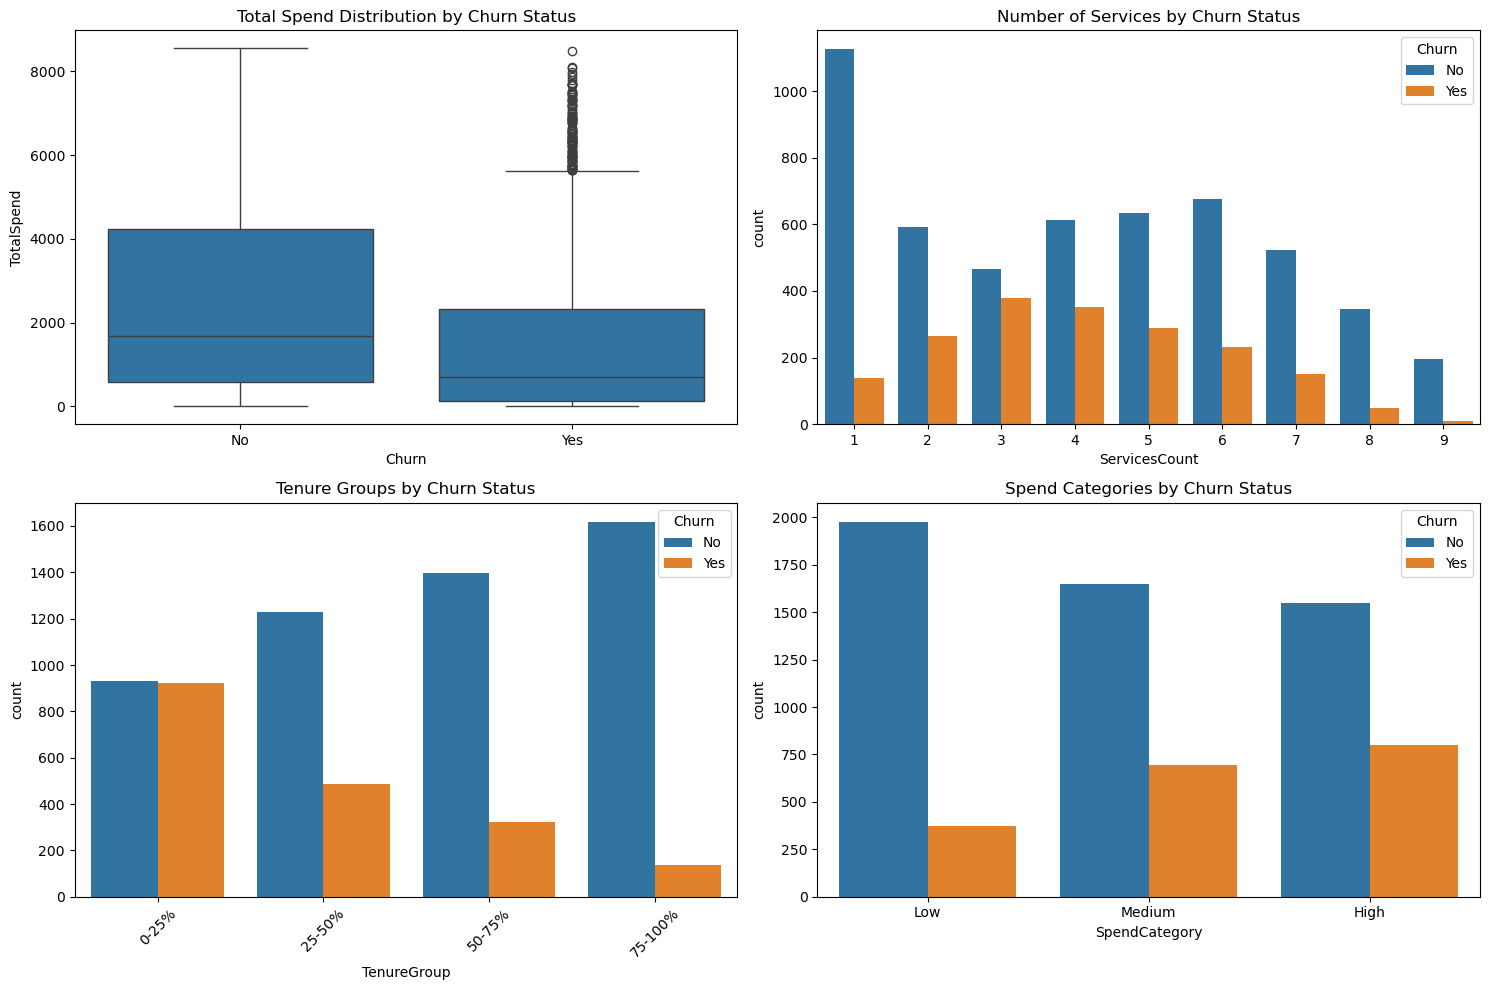

Summary of Engineered Features:
Average Services Count by Churn Status:
Churn
No     4.173174
Yes    4.071696
Name: ServicesCount, dtype: float64
Average Total Spend by Tenure Group:
TenureGroup
0-25%       210.012918
25-50%     1149.435248
50-75%     2886.371524
75-100%    4975.939259
Name: TotalSpend, dtype: float64


C:\Users\sbera\AppData\Local\Temp\ipykernel_20384\533933548.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('TenureGroup')['TotalSpend'].mean())


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create additional features
# 1. Customer Segments based on tenure
df['TenureGroup'] = pd.qcut(df['tenure'], q=4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])

# 2. Monthly Spend Categories
df['SpendCategory'] = pd.qcut(df['MonthlyCharges'], q=3, labels=['Low', 'Medium', 'High'])

# 3. Services Count (number of services subscribed)
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['ServicesCount'] = df[services].apply(lambda x: sum([1 for i in x if i not in ['No', 'No phone service', 'No internet service']]), axis=1)

# Visualize the engineered features
plt.figure(figsize=(15, 10))

# 1. Total Spend Distribution by Churn
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Churn', y='TotalSpend')
plt.title('Total Spend Distribution by Churn Status')

# 2. Services Count Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='ServicesCount', hue='Churn')
plt.title('Number of Services by Churn Status')

# 3. Tenure Group Distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='TenureGroup', hue='Churn')
plt.title('Tenure Groups by Churn Status')
plt.xticks(rotation=45)

# 4. Spend Category Distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='SpendCategory', hue='Churn')
plt.title('Spend Categories by Churn Status')

plt.tight_layout()
plt.show()

# Print summary statistics of engineered features
print("\
Summary of Engineered Features:")
print("\
Average Services Count by Churn Status:")
print(df.groupby('Churn')['ServicesCount'].mean())

print("\
Average Total Spend by Tenure Group:")
print(df.groupby('TenureGroup')['TotalSpend'].mean())

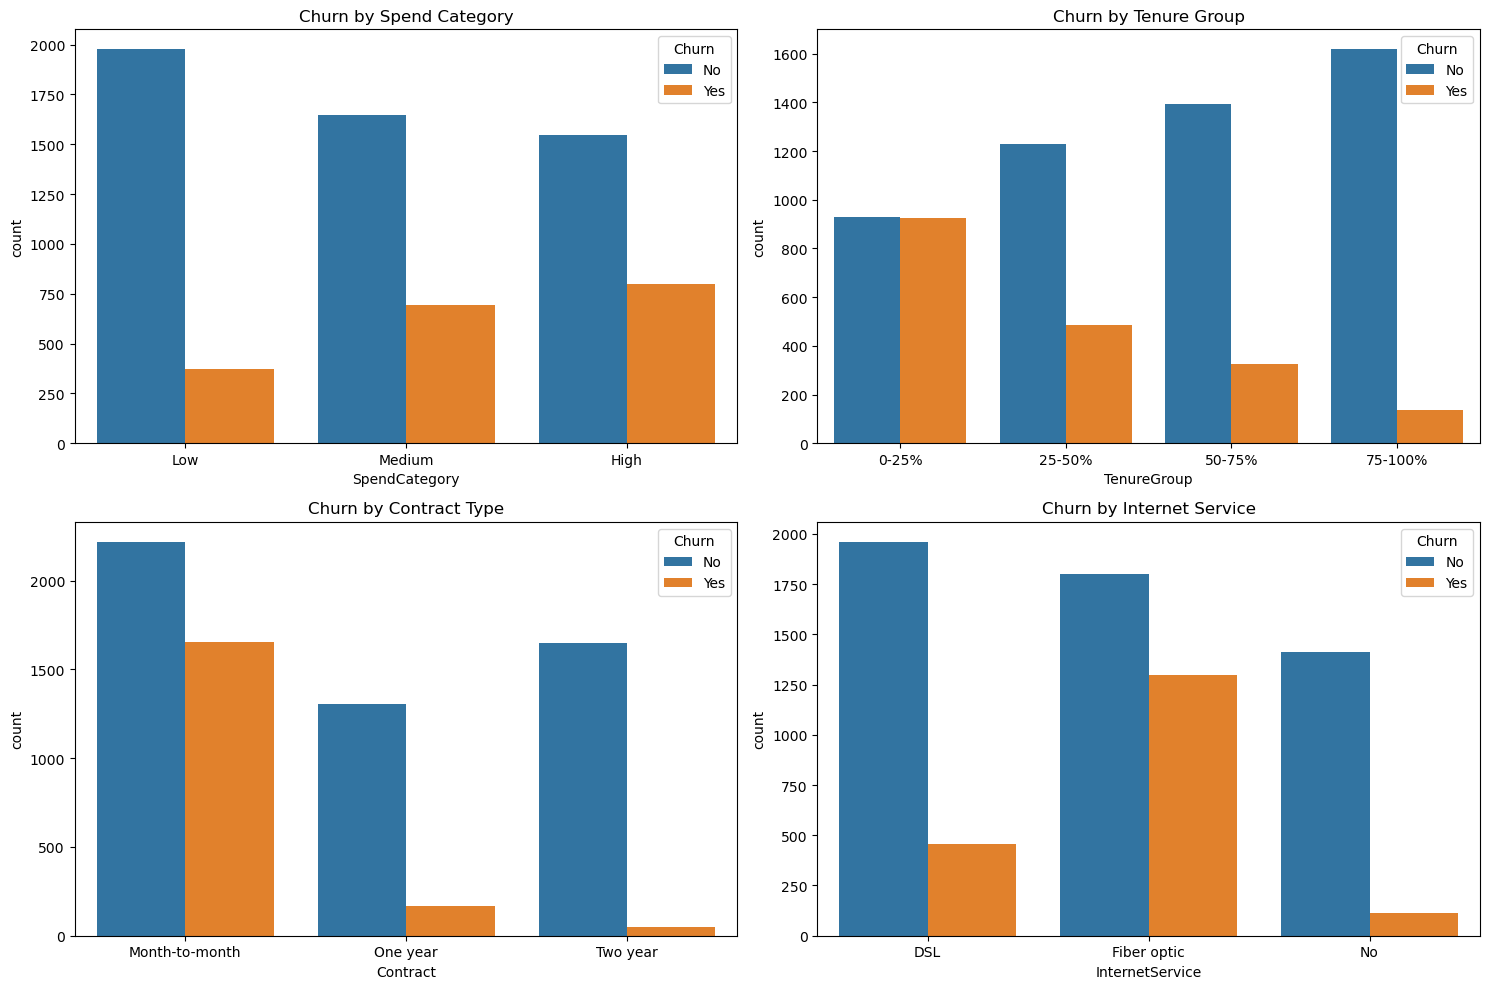

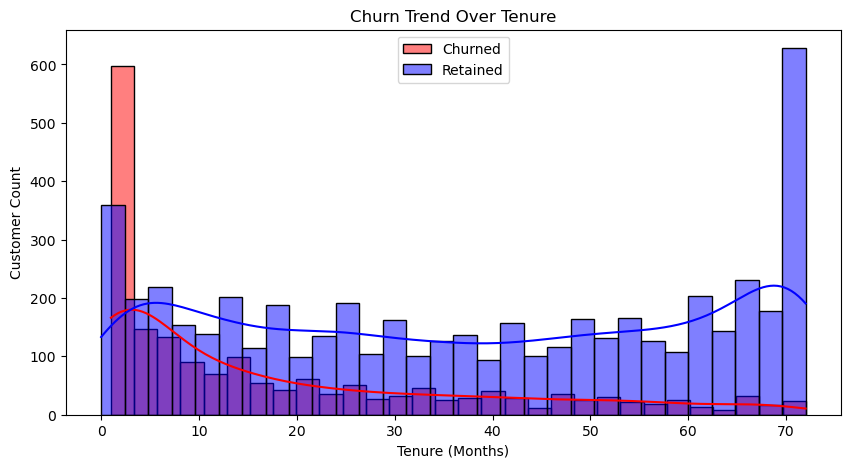

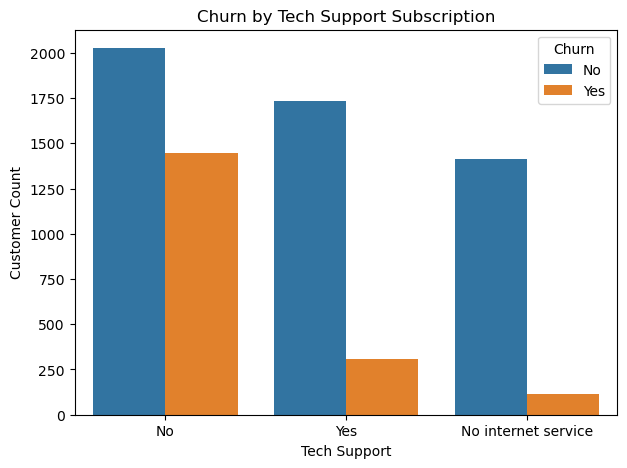

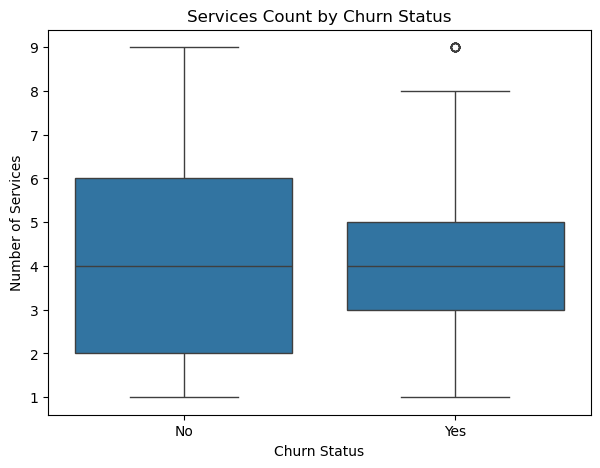

In [15]:
# Exploratory Data Analysis (EDA)

# 1. Customer Segments with the Highest Churn
plt.figure(figsize=(15, 10))

# Churn by Spend Category
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='SpendCategory', hue='Churn')
plt.title('Churn by Spend Category')

# Churn by Tenure Group
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='TenureGroup', hue='Churn')
plt.title('Churn by Tenure Group')

# Churn by Contract Type
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')

# Churn by Internet Service
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')

plt.tight_layout()
plt.show()

# 2. Churn Trend Over Time (Tenure as a proxy for time)
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['Churn'] == 'Yes'], x='tenure', bins=30, kde=True, color='red', label='Churned')
sns.histplot(data=df[df['Churn'] == 'No'], x='tenure', bins=30, kde=True, color='blue', label='Retained')
plt.title('Churn Trend Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Customer Count')
plt.legend()
plt.show()

# 3. Support Interactions and Churn (Proxy: TechSupport)
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn by Tech Support Subscription')
plt.xlabel('Tech Support')
plt.ylabel('Customer Count')
plt.show()

# 4. Usage Data and Churn (Proxy: Services Count)
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Churn', y='ServicesCount')
plt.title('Services Count by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Services')
plt.show()

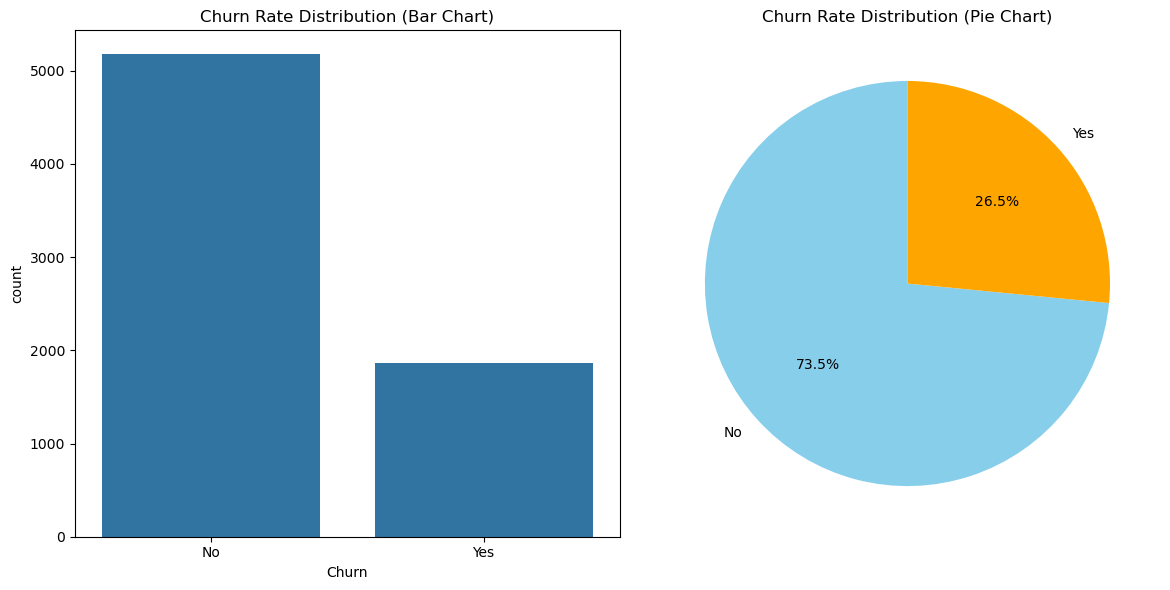

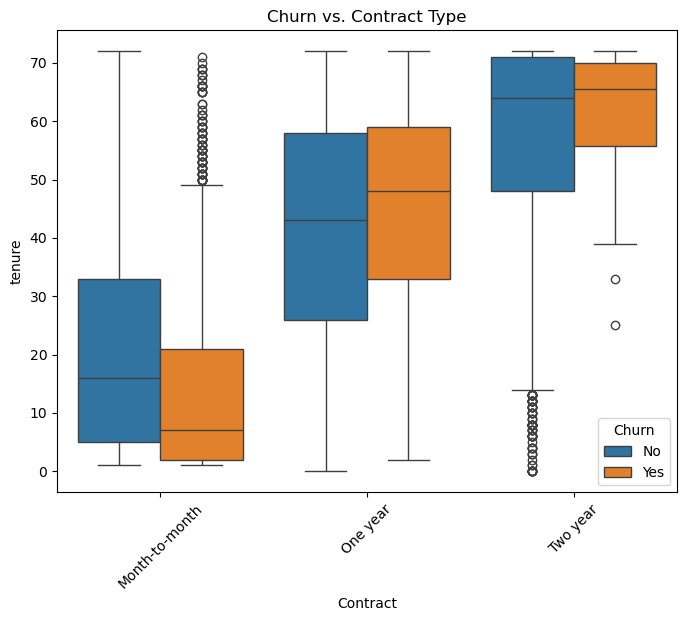

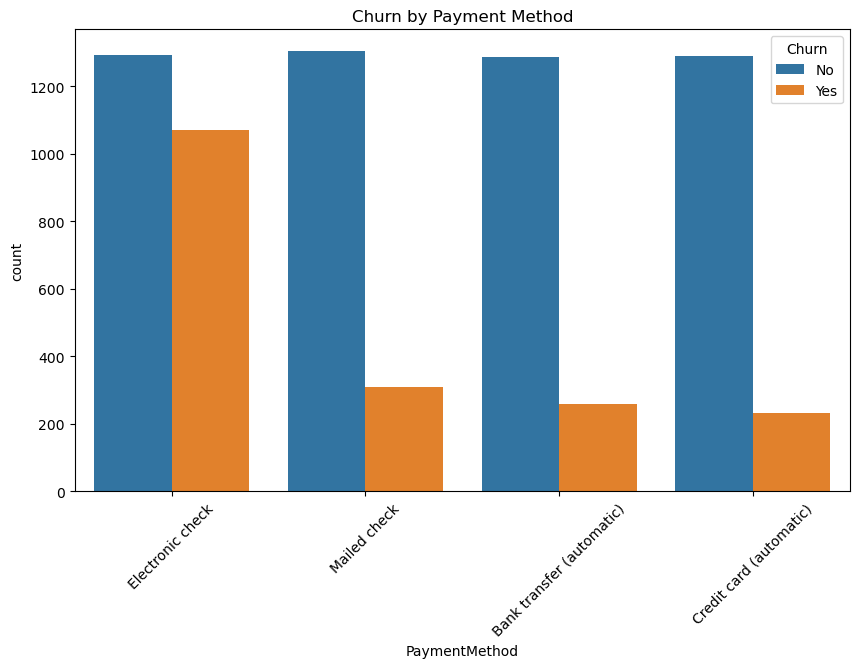

In [18]:
# 1. Churn Rate Distribution (Bar and Pie Charts)
plt.figure(figsize=(12, 6))

# Bar Chart
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn')
plt.title('Churn Rate Distribution (Bar Chart)')

# Pie Chart
plt.subplot(1, 2, 2)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Churn Rate Distribution (Pie Chart)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 2. Churn vs. Contract Type (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn')
plt.title('Churn vs. Contract Type')
plt.xticks(rotation=45)
plt.show()


# 3. Churn by Payment Method (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()



In [7]:
# Check the 'TotalCharges' column for non-numeric values and convert it to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any newly introduced missing values in 'TotalCharges'
missing_total_charges = df['TotalCharges'].isnull().sum()

# Display the count of missing values in 'TotalCharges'
print("Missing values in 'TotalCharges':", missing_total_charges)

# Display rows with missing 'TotalCharges' to understand the issue
print("Rows with missing 'TotalCharges':")
print(df[df['TotalCharges'].isnull()])

Missing values in 'TotalCharges': 11
Rows with missing 'TotalCharges':
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488    

In [9]:
# Let's clean the data:

# 1. Handle missing values in TotalCharges
# Since these are customers with 0 tenure, we can set their TotalCharges to 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 2. Convert categorical variables to numeric for modeling
# First, let's convert binary categorical variables
df['Churn'] = (df['Churn'] == 'Yes').astype(int)
df['gender'] = (df['gender'] == 'Male').astype(int)
df['Partner'] = (df['Partner'] == 'Yes').astype(int)
df['Dependents'] = (df['Dependents'] == 'Yes').astype(int)
df['PhoneService'] = (df['PhoneService'] == 'Yes').astype(int)
df['PaperlessBilling'] = (df['PaperlessBilling'] == 'Yes').astype(int)

# 3. Create dummy variables for categorical columns with multiple categories
categorical_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV',
                      'StreamingMovies', 'Contract', 'PaymentMethod', 'MultipleLines']

df_encoded = pd.get_dummies(df, columns=categorical_columns)

# 4. Remove customerID as it's not needed for analysis
df_encoded = df_encoded.drop('customerID', axis=1)

# Display information about the cleaned dataset
print("Cleaned Dataset Info:")
print("\
Shape:", df_encoded.shape)
print("\
Columns:", df_encoded.columns.tolist())
print("\
Sample of cleaned data:")
print(df_encoded.head())

# Check for any remaining missing values
print("\
Missing values after cleaning:")
print(df_encoded.isnull().sum().sum())

Cleaned Dataset Info:
Shape: (7043, 41)
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'MultipleLines_No', 'MultipleLines_No phone s

In [11]:
# Let's create some additional useful features

# 1. Service usage intensity score (number of services subscribed)
services = ['PhoneService', 'InternetService_DSL', 'InternetService_Fiber optic', 
            'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
            'StreamingTV_Yes', 'StreamingMovies_Yes']

df_encoded['Services_Count'] = df_encoded[services].sum(axis=1)

# 2. Monthly charges per service
df_encoded['Charge_Per_Service'] = df_encoded['MonthlyCharges'] / df_encoded['Services_Count']
df_encoded['Charge_Per_Service'] = df_encoded['Charge_Per_Service'].fillna(0)

# 3. Customer value score (combining tenure and monthly charges)
df_encoded['Customer_Value_Score'] = (df_encoded['tenure'] * df_encoded['MonthlyCharges']) / 1000

# 4. Contract type as risk factor (month-to-month being highest risk)
df_encoded['Contract_Risk'] = df_encoded['Contract_Month-to-month'].astype(int) * 3 + \
                             df_encoded['Contract_One year'].astype(int) * 2 + \
                             df_encoded['Contract_Two year'].astype(int)

# Display summary statistics of new features
print("Summary statistics of engineered features:")
print(df_encoded[['Services_Count', 'Charge_Per_Service', 
                  'Customer_Value_Score', 'Contract_Risk']].describe())

# Calculate correlation with churn
correlation_with_churn = df_encoded[['Services_Count', 'Charge_Per_Service', 
                                   'Customer_Value_Score', 'Contract_Risk', 'Churn']].corr()['Churn']

print("\
Correlation with Churn:")
print(correlation_with_churn)

Summary statistics of engineered features:
       Charge_Per_Service  Customer_Value_Score  Contract_Risk
count         7043.000000           7043.000000    7043.000000
mean            20.490331              2.279581       2.309527
std              6.023126              2.264729       0.833755
min              9.583333              0.000000       1.000000
25%             16.507143              0.394000       2.000000
50%             19.800000              1.393600       3.000000
75%             23.575000              3.786100       3.000000
max             41.200000              8.550000       3.000000
Correlation with Churn:
Services_Count          0.006794
Charge_Per_Service      0.262419
Customer_Value_Score   -0.198514
Contract_Risk           0.396713
Churn                   1.000000
Name: Churn, dtype: float64


C:\Users\sbera\AppData\Local\Temp\ipykernel_22948\3009697975.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Charge_Per_Service'] = df_encoded['Charge_Per_Service'].fillna(0)


In [15]:
# Reload the dataset and preprocess it again to ensure df_encoded is available
import pandas as pd

# Reload the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Handle missing values in TotalCharges by converting to numeric and filling NaN with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Redefine churn as binary (1 for Yes, 0 for No)
df_encoded['Churn'] = df_encoded['Churn_Yes']
df_encoded.drop(columns=['Churn_Yes'], inplace=True)

print("Dataset reloaded and preprocessed. df_encoded is now available.")

Dataset reloaded and preprocessed. df_encoded is now available.


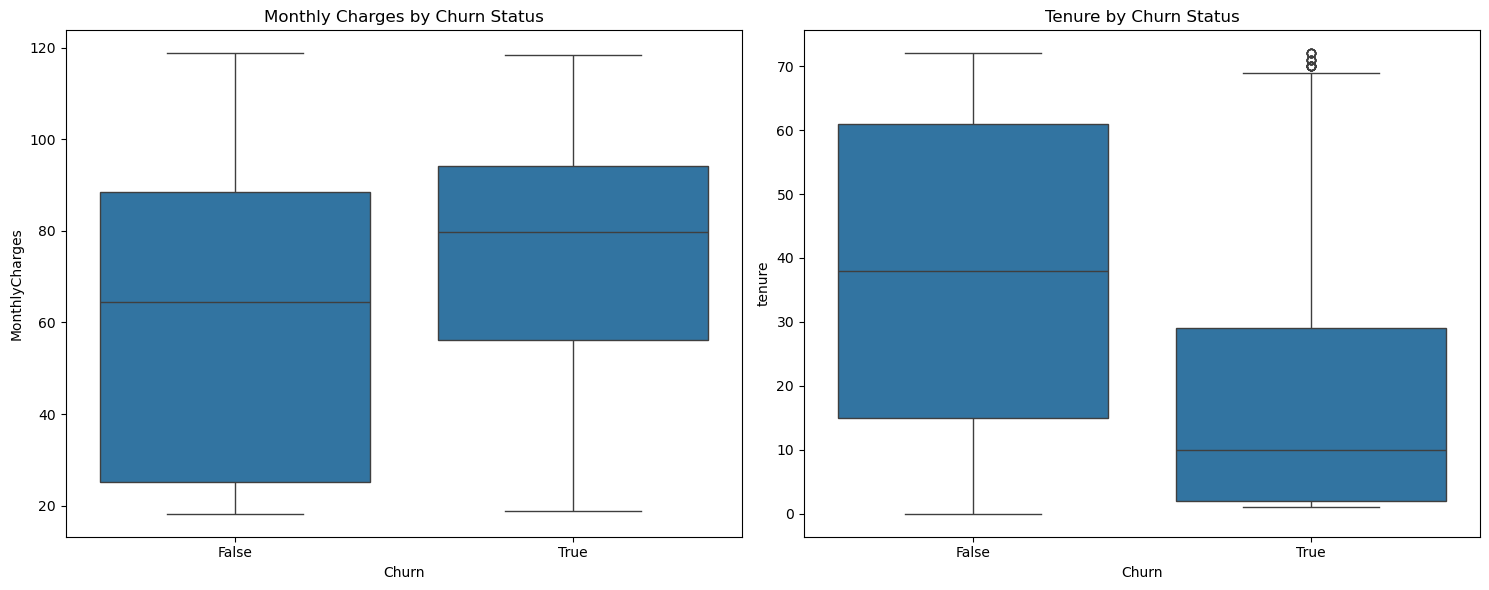

Churn Rate Analysis:
Average Monthly Charges:
Churn
False    61.265124
True     74.441332
Name: MonthlyCharges, dtype: float64
Average Tenure (months):
Churn
False    37.569965
True     17.979133
Name: tenure, dtype: float64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 1. Churn Analysis by Monthly Charges and Tenure
plt.figure(figsize=(15, 6))

# Plot 1: Monthly Charges vs Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_encoded)
plt.title('Monthly Charges by Churn Status')

# Plot 2: Tenure vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title('Tenure by Churn Status')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Churn Rate Analysis:")
print("\
Average Monthly Charges:")
print(df_encoded.groupby('Churn')['MonthlyCharges'].mean())
print("\
Average Tenure (months):")
print(df_encoded.groupby('Churn')['tenure'].mean())

In [23]:
# Adjust the feature selection to match the actual column names
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 
           'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year', 
           'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']

X = df_encoded[features]
y = df_encoded['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print model performance
print("Model Performance:")
print("\
Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\
Top Factors Contributing to Churn:")
print(feature_importance)


Model Performance:
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.91      0.88      1036
        True       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

Top Factors Contributing to Churn:
                          Feature  Importance
0                          tenure    1.192509
6               Contract_Two year    0.724464
2                    TotalCharges    0.465181
5               Contract_One year    0.326325
4     InternetService_Fiber optic    0.320217
8  PaymentMethod_Electronic check    0.233671
1                  MonthlyCharges    0.231014
7            PaperlessBilling_Yes    0.205470
3                   SeniorCitizen    0.105145


In [25]:
# Insights and Recommendations
# Based on the feature importance and model results, we can derive actionable insights:

# 1. Personalized communication for customers with low tenure
low_tenure_customers = df_encoded[df_encoded['tenure'] < 12]
low_tenure_churn_rate = low_tenure_customers['Churn'].mean()

# 2. Tier-based recommendations for customers with Fiber Optic Internet
fiber_optic_customers = df_encoded[df_encoded['InternetService_Fiber optic'] == 1]
fiber_optic_churn_rate = fiber_optic_customers['Churn'].mean()

# 3. Retention campaigns for customers on month-to-month contracts
month_to_month_customers = df_encoded[(df_encoded['Contract_One year'] == 0) & (df_encoded['Contract_Two year'] == 0)]
month_to_month_churn_rate = month_to_month_customers['Churn'].mean()

# 4. Improve support for customers using electronic checks
electronic_check_customers = df_encoded[df_encoded['PaymentMethod_Electronic check'] == 1]
electronic_check_churn_rate = electronic_check_customers['Churn'].mean()

# Print insights
print("Insights and Recommendations:")
print("\
1. Personalized Communication:")
print("Churn rate for customers with tenure < 12 months: " + str(low_tenure_churn_rate))
print("\
2. Tier-based Recommendations:")
print("Churn rate for Fiber Optic customers: " + str(fiber_optic_churn_rate))
print("\
3. Retention Campaigns:")
print("Churn rate for month-to-month contract customers: " + str(month_to_month_churn_rate))
print("\
4. Improve Support:")
print("Churn rate for customers using electronic checks: " + str(electronic_check_churn_rate))

Insights and Recommendations:
1. Personalized Communication:
Churn rate for customers with tenure < 12 months: 0.4828419526341228
2. Tier-based Recommendations:
Churn rate for Fiber Optic customers: 0.4189276485788114
3. Retention Campaigns:
Churn rate for month-to-month contract customers: 0.4270967741935484
4. Improve Support:
Churn rate for customers using electronic checks: 0.4528541226215645
